# **Tenovia Data Analytics Assignment**                                       (Raasi P -  2039415)

Attached in the excel sheet is a sample product revenue/views related data and the data definition for all columns. Your task for this assignment is to explore this data as much as you can and come up with insights that would help the business make better decisions about their top selling products

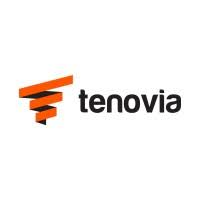

Tenovia is a Bangalore-based E-commerce consulting firm that’s accelerating the growth of digital revenues for brands. They are an end-to- end, 360 degrees E-commerce and Digital Partner guiding and working with our clients to achieve their full potential in an increasingly digital driven world.

They help strategize with their clients and set the digital roadmap for them and then help them execute it. Their ability to think at 35,000 feet and execute at the trenches is what they consider their USP. Some of their clients include Paragon footwear, Soch, The BodyShop, Luxor, MTR and many more across diverse industries.

Theye work with multiple eCommerce channels by identifying new product lines that take advantage of the e-Commerce channel economics. Their tried and tested methods have given us concrete results - a proven track record of making significant revenues for their customers.

### ***Table of Contents***

1. Data Cleaning
2. Exploratory Data Analysis (EDA)
3. Feature Engineering
4. Visual EDA
5. Detecting outliers
6. Spliting the Dataset
7. Logistic Regression

Conclusion

# **Analysing E Commerce Dataset**

There are multiple datasets consisting of customer transaction details . The dataset provides a great opportunity to let us explore in different angles

 **Importing the required Packages**

In [ ]:
## Loading the required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
import calendar
from scipy.stats import skew,kurtosis
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

**Importing the Dataset**

In [ ]:
df = pd.read_csv("Sample Product Data.csv")
df.head(5)

,SKU,Product_Name,Date,itemRevenue,itemQuantity,buyToDetailRate,productAddsToCart,cartToDetailRate,uniquePurchases,quantityAddedToCart,revenuePerItem,productRevenuePerPurchase,itemsPerPurchase,productDetailViews,sessions,bounceRate,pageViews,pageviewsPerSession,sessionDuration,users,newUsers
0,A1R11603GBLK00011G749,Men's Plus Black Sandal,2021-06-07,749.0,1,0.584771,0,0.550132,1,0,749.0,749.0,1,0,10,0.532958,100,0,120,1,0
1,A1PU9601GTAN00008G539,Men's Brown Sandals,2021-06-07,539.0,1,0.102999,1,0.411237,1,1,539.0,539.0,1,0,10,0.707097,100,0,227,1,0
2,A1FB9102GPBYL00007G499,Men's Blue Sandals,2021-06-07,499.0,1,0.384049,2,0.851673,1,2,499.0,499.0,1,0,10,0.879106,100,0,972,1,0
3,A1FB9572GPTAN00006G499,Men's Tan Formal Shoes,2021-06-07,499.0,1,0.663615,3,0.252067,1,3,499.0,499.0,1,0,10,0.879087,100,0,470,1,0
4,A1EV1420LBLK00007G110,Women's Black Flip-Flops,2021-06-07,658.0,2,0.659111,1,0.924743,2,1,329.0,329.0,1,0,10,0.368253,100,0,376,1,1


**Shape of the Dataset**

In [ ]:
df.shape

(2170, 21)

In [ ]:
df.describe()

,itemRevenue,itemQuantity,buyToDetailRate,productAddsToCart,cartToDetailRate,uniquePurchases,quantityAddedToCart,revenuePerItem,productRevenuePerPurchase,itemsPerPurchase,productDetailViews,sessions,bounceRate,pageViews,pageviewsPerSession,sessionDuration,users,newUsers
count,126.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.0,2170.000000,2170.000000,2170.000000
mean,361.769841,0.081106,0.500330,0.348848,0.498002,0.079263,0.352995,13.988172,14.228725,0.059908,4.091244,32.769585,0.504506,327.695853,0.0,501.467742,3.276959,1.597696
std,320.845032,0.371734,0.286000,0.709197,0.288224,0.364622,0.721023,65.979799,66.639082,0.245017,6.580352,46.055346,0.291945,460.553458,0.0,290.877658,4.605535,3.013554
min,77.000000,0.000000,0.001207,0.000000,0.000711,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000690,100.000000,0.0,1.000000,1.000000,0.000000
25%,129.250000,0.000000,0.253793,0.000000,0.247815,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.252573,100.000000,0.0,250.250000,1.000000,0.000000
50%,224.500000,0.000000,0.504801,0.000000,0.496590,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,20.000000,0.513127,200.000000,0.0,501.000000,2.000000,1.000000
75%,539.000000,0.000000,0.741561,1.000000,0.752451,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,40.000000,0.755743,400.000000,0.0,755.000000,4.000000,2.000000
max,1518.000000,4.000000,0.999941,5.000000,0.999885,4.000000,5.000000,759.000000,759.000000,2.000000,115.000000,1010.000000,0.999592,10100.000000,0.0,1000.000000,101.000000,66.000000


## **1. Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SKU                        2170 non-null   object 
 1   Product_Name               2170 non-null   object 
 2   Date                       2170 non-null   object 
 3   itemRevenue                126 non-null    float64
 4   itemQuantity               2170 non-null   int64  
 5   buyToDetailRate            2170 non-null   float64
 6   productAddsToCart          2170 non-null   int64  
 7   cartToDetailRate           2170 non-null   float64
 8   uniquePurchases            2170 non-null   int64  
 9   quantityAddedToCart        2170 non-null   int64  
 10  revenuePerItem             2170 non-null   float64
 11  productRevenuePerPurchase  2170 non-null   float64
 12  itemsPerPurchase           2170 non-null   int64  
 13  productDetailViews         2170 non-null   int64

*The column related to the transaction date will be converted from 'object' (a simple string basically) to the very convenient date format "date-time" in pandas*

In [ ]:
df['Date']=pd.to_datetime(df.Date, format='%Y/%m/%d %H:%M')

*The exact number of missing values in each column is:*

In [ ]:
df.isnull().sum().sort_values(ascending=False)

itemRevenue                  2044
newUsers                        0
quantityAddedToCart             0
Product_Name                    0
Date                            0
itemQuantity                    0
buyToDetailRate                 0
productAddsToCart               0
cartToDetailRate                0
uniquePurchases                 0
revenuePerItem                  0
users                           0
productRevenuePerPurchase       0
itemsPerPurchase                0
productDetailViews              0
sessions                        0
bounceRate                      0
pageViews                       0
pageviewsPerSession             0
sessionDuration                 0
SKU                             0
dtype: int64

*The portion of dataframe where some values are missing is the following:*

In [ ]:
df_miss=df[df.isnull().any(axis=1)]
df_miss.head()

,SKU,Product_Name,Date,itemRevenue,itemQuantity,buyToDetailRate,productAddsToCart,cartToDetailRate,uniquePurchases,quantityAddedToCart,revenuePerItem,productRevenuePerPurchase,itemsPerPurchase,productDetailViews,sessions,bounceRate,pageViews,pageviewsPerSession,sessionDuration,users,newUsers
56,16501-Cherry,Women Cherry Zip Handbags,2021-06-07,NaN,0,0.850405,0,0.345863,0,0,0.0,0.0,0,1,10,0.100487,100,0,780,1,1
57,16501-Cream,Women Cream Zip Handbags,2021-06-07,NaN,0,0.197876,0,0.530978,0,0,0.0,0.0,0,2,20,0.778570,200,0,71,2,0
58,16502-Beige,Women Beige Zip Handbags,2021-06-07,NaN,0,0.999675,0,0.533745,0,0,0.0,0.0,0,1,10,0.564948,100,0,168,1,1
59,16502-Cherry,Women Cherry Zip Handbags,2021-06-07,NaN,0,0.807595,0,0.309247,0,0,0.0,0.0,0,1,10,0.354590,100,0,891,1,1
60,16503-Tan,Women Tan Zip Handbags,2021-06-07,NaN,0,0.289372,0,0.788002,0,0,0.0,0.0,0,2,20,0.911677,200,0,635,2,0


**Is there any relationship between the missing data?**

In [ ]:
df_miss["day"] = df_miss['Date'].map(lambda x: x.day)
df_miss["month"] = df_miss['Date'].map(lambda x: x.month)
df_miss["year"] = df_miss['Date'].map(lambda x: x.year)

In [ ]:
df_miss['daymonth']=df_miss['day'].astype(str)+'/'+df_miss['month'].astype(str)
df_miss['daymonthyear']=df_miss['daymonth'].astype(str)+'/'+df_miss['year'].astype(str)
df_miss['monthyear']=df_miss['month'].astype(str)+'/'+df_miss['year'].astype(str)

In [ ]:
df_miss.head()

,SKU,Product_Name,Date,itemRevenue,itemQuantity,buyToDetailRate,productAddsToCart,cartToDetailRate,uniquePurchases,quantityAddedToCart,revenuePerItem,productRevenuePerPurchase,itemsPerPurchase,productDetailViews,sessions,bounceRate,pageViews,pageviewsPerSession,sessionDuration,users,newUsers,day,month,year,daymonth,daymonthyear,monthyear
56,16501-Cherry,Women Cherry Zip Handbags,2021-06-07,NaN,0,0.850405,0,0.345863,0,0,0.0,0.0,0,1,10,0.100487,100,0,780,1,1,7,6,2021,7/6,7/6/2021,6/2021
57,16501-Cream,Women Cream Zip Handbags,2021-06-07,NaN,0,0.197876,0,0.530978,0,0,0.0,0.0,0,2,20,0.778570,200,0,71,2,0,7,6,2021,7/6,7/6/2021,6/2021
58,16502-Beige,Women Beige Zip Handbags,2021-06-07,NaN,0,0.999675,0,0.533745,0,0,0.0,0.0,0,1,10,0.564948,100,0,168,1,1,7,6,2021,7/6,7/6/2021,6/2021
59,16502-Cherry,Women Cherry Zip Handbags,2021-06-07,NaN,0,0.807595,0,0.309247,0,0,0.0,0.0,0,1,10,0.354590,100,0,891,1,1,7,6,2021,7/6,7/6/2021,6/2021
60,16503-Tan,Women Tan Zip Handbags,2021-06-07,NaN,0,0.289372,0,0.788002,0,0,0.0,0.0,0,2,20,0.911677,200,0,635,2,0,7,6,2021,7/6,7/6/2021,6/2021


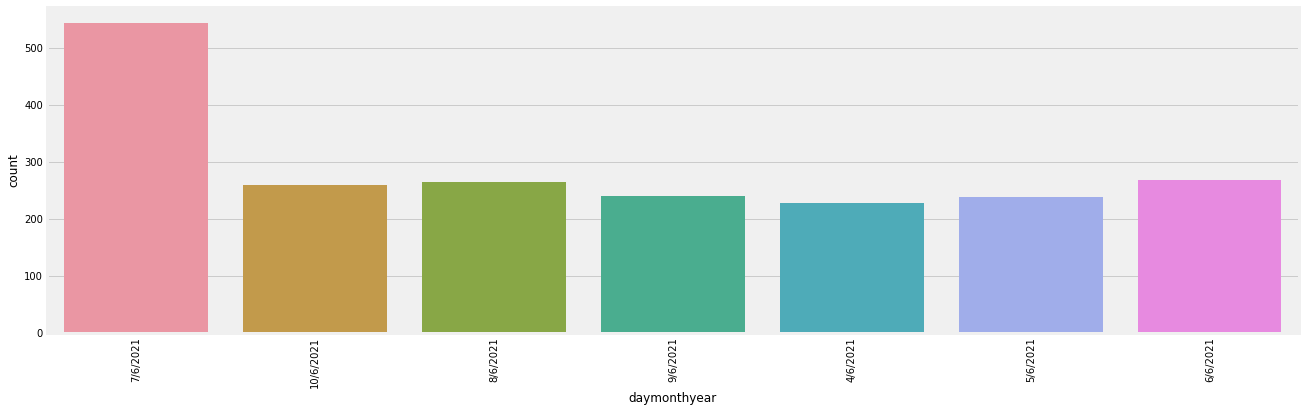

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
ax = sns.countplot(x='daymonthyear', data=df_miss)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

 *its clear that during some days there have been more missing values than others. In particular the days with most missing values are:*

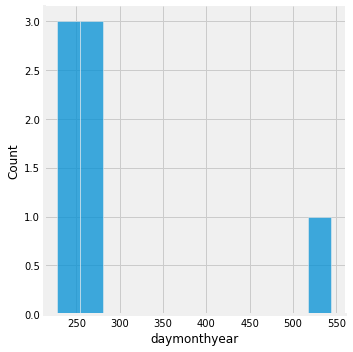

In [ ]:
sns.displot(df_miss['daymonthyear'].value_counts())

*We can see that during some days, more than 500 customers_id are missing. We will now check the days where most cusomers id are missing.*

In [ ]:
df_miss['daymonthyear'].value_counts()[:20]

7/6/2021     544
6/6/2021     269
8/6/2021     264
10/6/2021    259
9/6/2021     241
5/6/2021     239
4/6/2021     228
Name: daymonthyear, dtype: int64

*It could be interesting to check if during these days something happend and caused the missing values*

*For further analysis, the rows with missing values will be dropped and a new df called 'df_new' will be defined*

In [ ]:
df_new=df.dropna()

In [ ]:
#check if there a are missing values in the new dataframe
df_new.isnull().sum().sort_values(ascending=False)

newUsers                     0
quantityAddedToCart          0
Product_Name                 0
Date                         0
itemRevenue                  0
itemQuantity                 0
buyToDetailRate              0
productAddsToCart            0
cartToDetailRate             0
uniquePurchases              0
revenuePerItem               0
users                        0
productRevenuePerPurchase    0
itemsPerPurchase             0
productDetailViews           0
sessions                     0
bounceRate                   0
pageViews                    0
pageviewsPerSession          0
sessionDuration              0
SKU                          0
dtype: int64

*Now the dataframe does not have any missing values*

**Duplicated Values handling**

In [ ]:
df_new[df_new.duplicated()].head()

,SKU,Product_Name,Date,itemRevenue,itemQuantity,buyToDetailRate,productAddsToCart,cartToDetailRate,uniquePurchases,quantityAddedToCart,revenuePerItem,productRevenuePerPurchase,itemsPerPurchase,productDetailViews,sessions,bounceRate,pageViews,pageviewsPerSession,sessionDuration,users,newUsers


In [ ]:
df_new.duplicated().sum()

0

*There are no duplicated transactions in this dataset*

## **2. Exploratory Data Analysis (EDA)**

**How many orders by the users?**

In [ ]:
orders=df_new.groupby(by=['SKU','Product_Name'], as_index=True)['users'].count()
orders

SKU                     Product_Name                 
A1CA0001CWHT00009G239   Kids White School Shoes          1
A1EV1125CBLK00013G95    Kids Black P-Toes Flip-Flops     1
A1EV1170LBLK00008G120   Women's  Black Sandal            1
A1EV1215LBKR00007G105   Women's Red  Flip-Flops          1
A1EV1267GRED00008G199   Men's Casual Red Flip-Flops      1
                                                        ..
A1PV0694CPBLU00011G269  Kids P-Toes Blue Casual Shoes    1
A1R10537LCRM00007G599   Women's  Plus Cream Sandal       2
A1R11603GBLK00011G749   Men's  Plus Black Sandal         2
R15503G42G699           Men's Black  Formal Belt         1
R15513G42G799           Men's Brown  Formal Belt         1
Name: users, Length: 85, dtype: int64

The column users has the count of users for each SKU

The equivalent code in SQL would be:

SELECT SKU,  Product_Name, count(users)

FROM df_new

GROUP BY  SKU,  Product_Name

ORDER BY  SKU;

*Let's continue checking Product_Name column. Here we can see items that were bought most often.*

In [ ]:
df['Product_Name'].value_counts().head()

Men's Black  Flip-Flops     126
Men's Grey  Sandals          66
Men's Brown  Flip-Flops      57
Men's Brown  Formal Belt     43
Women's Blue  Flip-Flops     42
Name: Product_Name, dtype: int64

Here we can see our best selling products, items that appear in orders the most often. Also to make it visually more appealing let's create a bar chart for 15 top items.

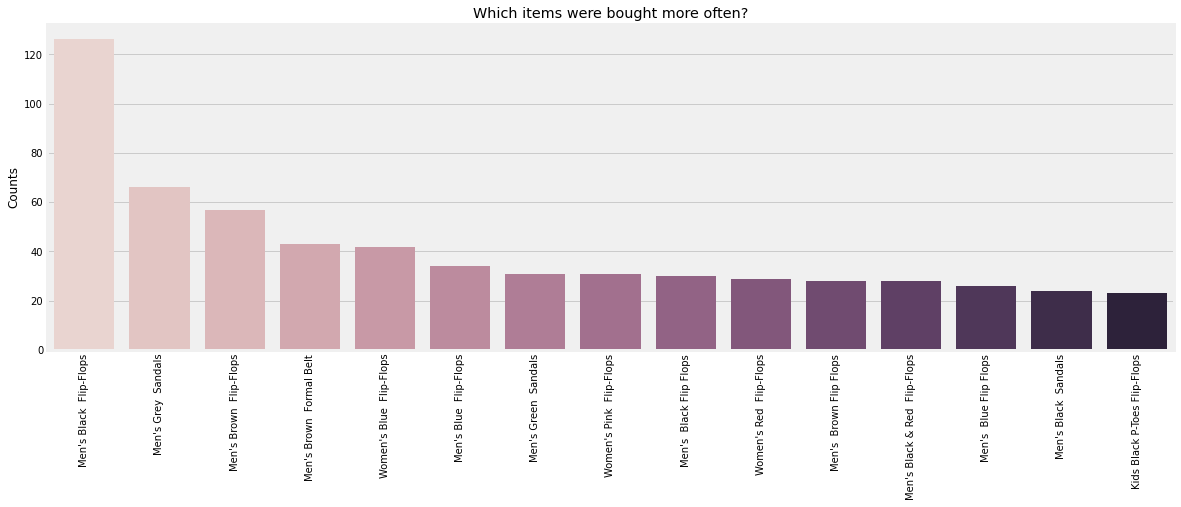

In [ ]:
item_counts = df['Product_Name'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(item_counts.index, item_counts.values, palette=sns.cubehelix_palette(15))
plt.ylabel("Counts")
plt.title("Which items were bought more often?");
plt.xticks(rotation=90);

In [ ]:
df['Product_Name'].value_counts().tail()

Men's Brown Walkie Semi Formal         1
Women's P Toes Pink Sandals            1
Men's Black & Red  Sports Shoes        1
Men's Slickers  Black Formal Sandal    1
Men's   Tan Casual shoes               1
Name: Product_Name, dtype: int64

We also notice from above code that valid items are normally uppercased and non-valid or cancelations are in lower case

In [ ]:
df[~df['Product_Name'].str.islower()]['Product_Name'].value_counts().head()

Men's Black  Flip-Flops     126
Men's Grey  Sandals          66
Men's Brown  Flip-Flops      57
Men's Brown  Formal Belt     43
Women's Blue  Flip-Flops     42
Name: Product_Name, dtype: int64

Quick check of the case of letters in Product_Name says that there are no units with upper case letters in their name. So we can understand that data management in the store need to look into this.

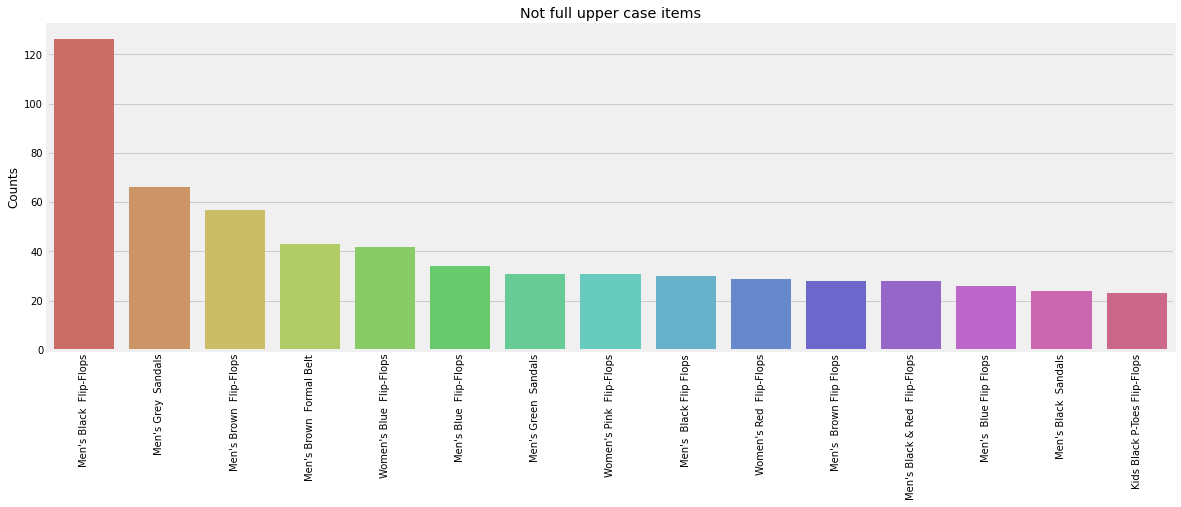

In [ ]:
lcase_counts = df[~df['Product_Name'].str.islower()]['Product_Name'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(lcase_counts.index, lcase_counts.values, palette=sns.color_palette("hls", 15))
plt.ylabel("Counts")
plt.title("Not full upper case items");
plt.xticks(rotation=90);

ALso checking out SKU.

In [ ]:
df['SKU'].value_counts().head()

EV1136L-Black        7
FB9066G-Black-Red    7
EV0740G-Black        7
EV1279L-Pink         7
EV2234G-Black        7
Name: SKU, dtype: int64

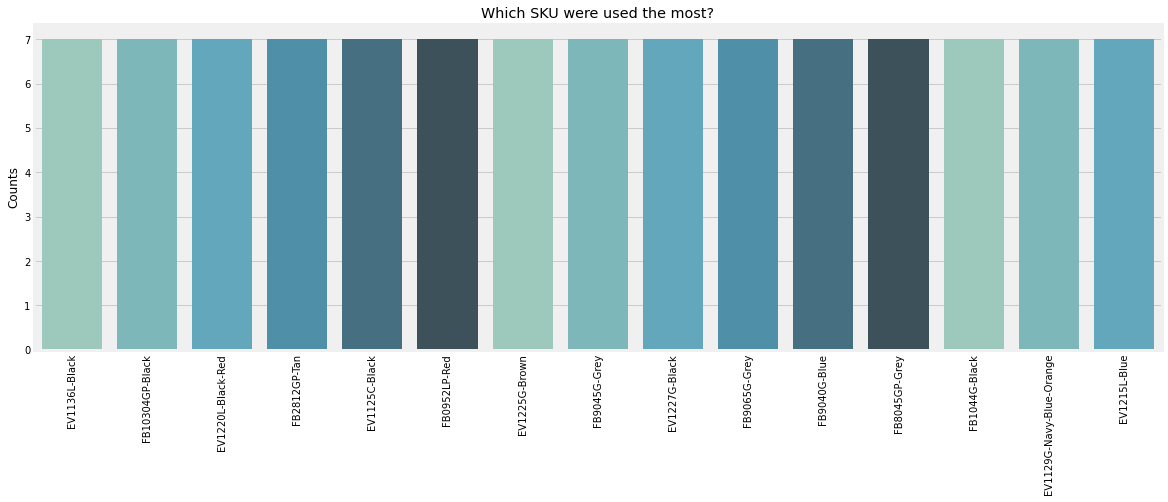

In [ ]:
stock_counts = df['SKU'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(stock_counts.index, stock_counts.values, palette=sns.color_palette("GnBu_d"))
plt.ylabel("Counts")
plt.title("Which SKU were used the most?");
plt.xticks(rotation=90);

During exploratory data analysis we can go back to the same operations and checks, just to understand how our actions affected the dataset. EDA is the series of repetitive tasks to understand better our data. And here, for example we get back to .describe() method to get an overall picture of our data after some manipulations.

We still see negative quantities and negative prices, let's get into those records.

In [ ]:
# df[df['Quantity'] < 0]
df[df['itemQuantity'] < 0].head()

,SKU,Product_Name,Date,itemRevenue,itemQuantity,buyToDetailRate,productAddsToCart,cartToDetailRate,uniquePurchases,quantityAddedToCart,revenuePerItem,productRevenuePerPurchase,itemsPerPurchase,productDetailViews,sessions,bounceRate,pageViews,pageviewsPerSession,sessionDuration,users,newUsers


Here we can see that there are no  "Negative quantities".

During exploratory data analysis we can go back to the same operations and checks, just to understand how our actions affected the dataset. EDA is the series of repetitive tasks to understand better our data. And here, for example we get back to .describe() method to get an overall picture of our data after some manipulations.

In [ ]:
df = df[df['revenuePerItem'] > 0]
df.describe()

,itemRevenue,itemQuantity,buyToDetailRate,productAddsToCart,cartToDetailRate,uniquePurchases,quantityAddedToCart,revenuePerItem,productRevenuePerPurchase,itemsPerPurchase,productDetailViews,sessions,bounceRate,pageViews,pageviewsPerSession,sessionDuration,users,newUsers
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.0,126.000000,126.000000,126.000000,126.0,126.000000,126.000000,126.000000
mean,361.769841,1.396825,0.510757,0.865079,0.496335,1.365079,0.888889,240.907407,245.050265,1.031746,0.0,11.587302,0.529753,115.873016,0.0,485.587302,1.158730,0.531746
std,320.845032,0.738424,0.294364,1.014717,0.287586,0.733247,1.067500,142.951718,141.565569,0.176023,0.0,4.632528,0.300776,46.325282,0.0,292.931207,0.463253,0.665571
min,77.000000,1.000000,0.002249,0.000000,0.002167,1.000000,0.000000,77.000000,77.000000,1.000000,0.0,10.000000,0.001045,100.000000,0.0,10.000000,1.000000,0.000000
25%,129.250000,1.000000,0.262570,0.000000,0.251957,1.000000,0.000000,126.000000,126.000000,1.000000,0.0,10.000000,0.256912,100.000000,0.0,236.500000,1.000000,0.000000
50%,224.500000,1.000000,0.531981,1.000000,0.498651,1.000000,1.000000,209.000000,209.000000,1.000000,0.0,10.000000,0.583011,100.000000,0.0,459.500000,1.000000,0.000000
75%,539.000000,2.000000,0.754097,1.000000,0.758365,2.000000,1.000000,329.000000,329.000000,1.000000,0.0,10.000000,0.757587,100.000000,0.0,761.500000,1.000000,1.000000
max,1518.000000,4.000000,0.998032,5.000000,0.993690,4.000000,5.000000,759.000000,759.000000,2.000000,0.0,40.000000,0.993077,400.000000,0.0,997.000000,4.000000,4.000000


As we have finished cleaning our data and removed all suspicious records we can start creating some new features for our model. Let's start with the most obvious one - TotalSales. We have quantities, we have revenuesPerItem - we can calculate the Total revenue.

## **3. Feature Engineering**

In [ ]:
df_new['total_revenue']=df_new['itemQuantity'] * df_new['itemRevenue']

In [ ]:
df_new.head()

,SKU,Product_Name,Date,itemRevenue,itemQuantity,buyToDetailRate,productAddsToCart,cartToDetailRate,uniquePurchases,quantityAddedToCart,revenuePerItem,productRevenuePerPurchase,itemsPerPurchase,productDetailViews,sessions,bounceRate,pageViews,pageviewsPerSession,sessionDuration,users,newUsers,total_revenue
0,A1R11603GBLK00011G749,Men's Plus Black Sandal,2021-06-07,749.0,1,0.584771,0,0.550132,1,0,749.0,749.0,1,0,10,0.532958,100,0,120,1,0,749.0
1,A1PU9601GTAN00008G539,Men's Brown Sandals,2021-06-07,539.0,1,0.102999,1,0.411237,1,1,539.0,539.0,1,0,10,0.707097,100,0,227,1,0,539.0
2,A1FB9102GPBYL00007G499,Men's Blue Sandals,2021-06-07,499.0,1,0.384049,2,0.851673,1,2,499.0,499.0,1,0,10,0.879106,100,0,972,1,0,499.0
3,A1FB9572GPTAN00006G499,Men's Tan Formal Shoes,2021-06-07,499.0,1,0.663615,3,0.252067,1,3,499.0,499.0,1,0,10,0.879087,100,0,470,1,0,499.0
4,A1EV1420LBLK00007G110,Women's Black Flip-Flops,2021-06-07,658.0,2,0.659111,1,0.924743,2,1,329.0,329.0,1,0,10,0.368253,100,0,376,1,1,1316.0


We will reorder the columns for easier reference

In [ ]:
df_new=df_new[['SKU', 'Product_Name', 'Date','itemRevenue', 'itemQuantity', 'revenuePerItem', 'users', 'newUsers', 'total_revenue']]

In [ ]:
df_new.head()

,SKU,Product_Name,Date,itemRevenue,itemQuantity,revenuePerItem,users,newUsers,total_revenue
0,A1R11603GBLK00011G749,Men's Plus Black Sandal,2021-06-07,749.0,1,749.0,1,0,749.0
1,A1PU9601GTAN00008G539,Men's Brown Sandals,2021-06-07,539.0,1,539.0,1,0,539.0
2,A1FB9102GPBYL00007G499,Men's Blue Sandals,2021-06-07,499.0,1,499.0,1,0,499.0
3,A1FB9572GPTAN00006G499,Men's Tan Formal Shoes,2021-06-07,499.0,1,499.0,1,0,499.0
4,A1EV1420LBLK00007G110,Women's Black Flip-Flops,2021-06-07,658.0,2,329.0,1,1,1316.0


## **4. Visual EDA**

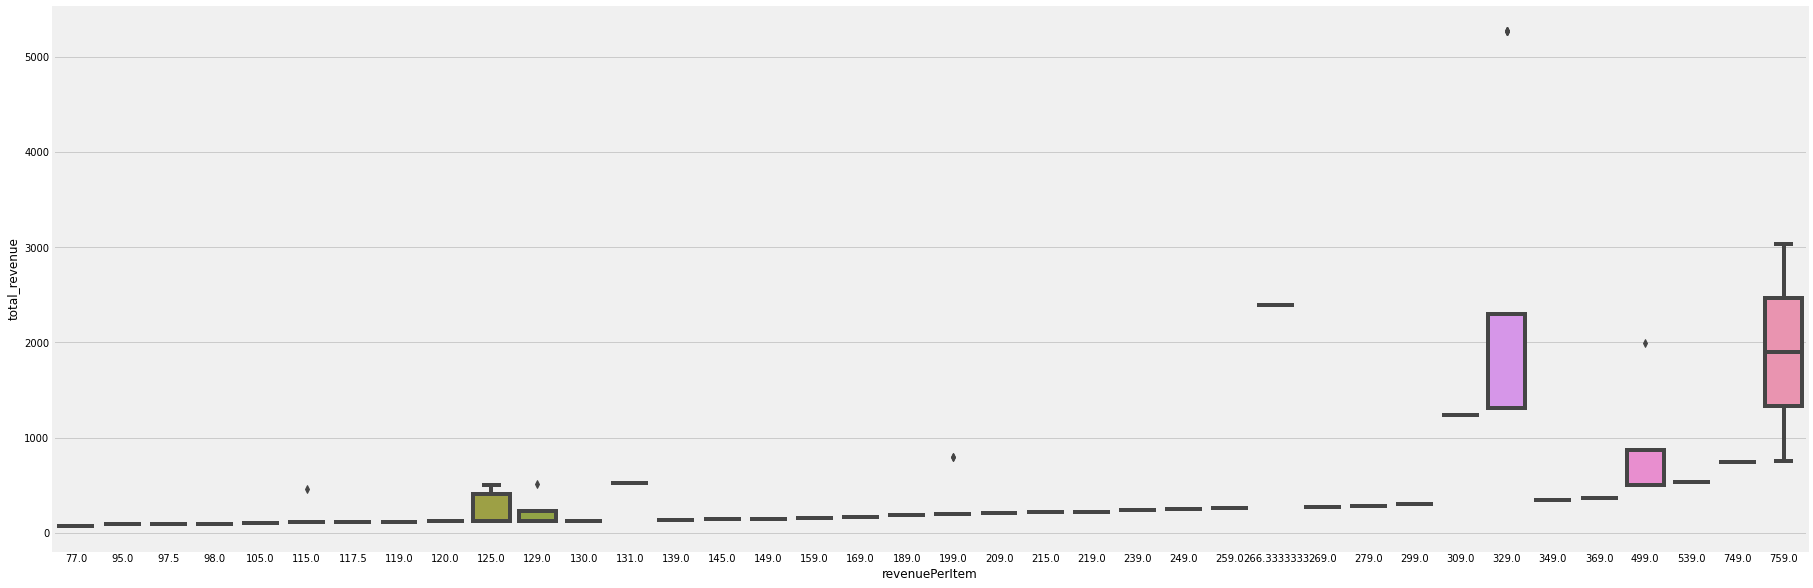

In [ ]:
plt.figure(figsize =(28,10))
sns.boxplot("revenuePerItem", "total_revenue", data=df_new)
plt.show()

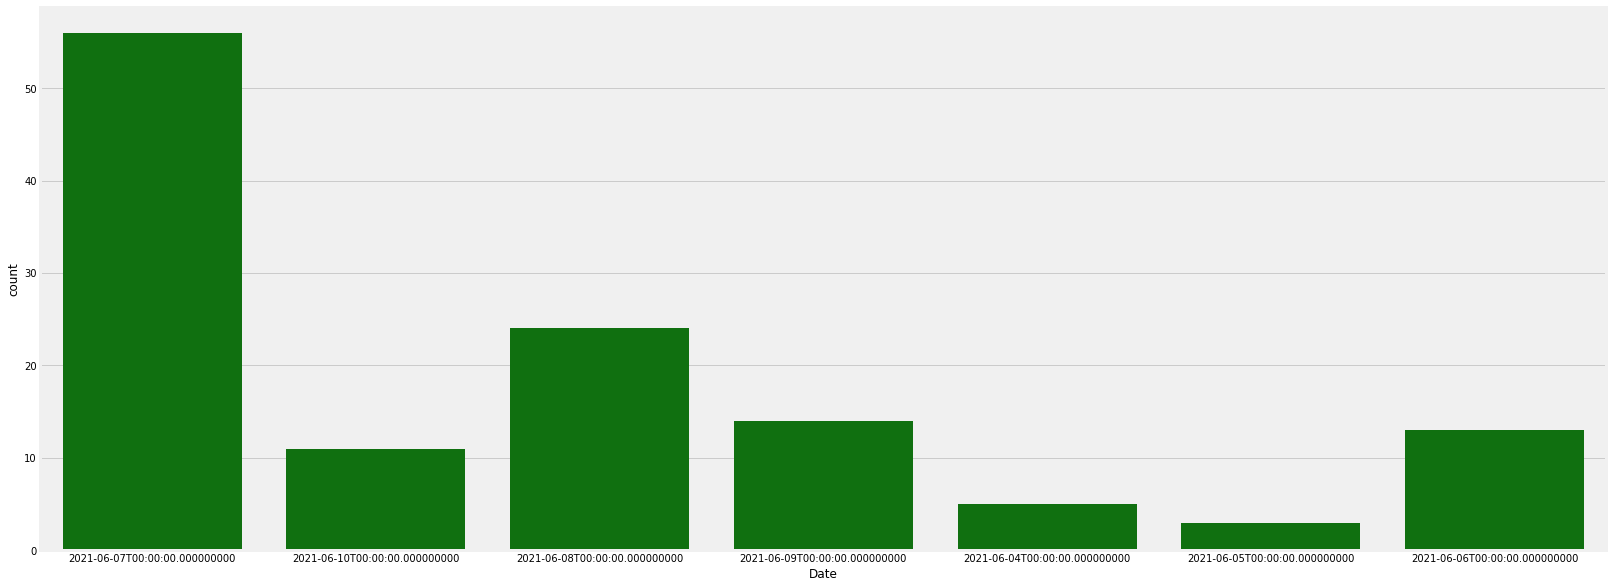

In [ ]:
plt.figure(figsize = (25,10))
sns.countplot(x='Date', data=df, color='green')
plt.show()

As we can see, on 2021-o6 the sales were high compre to other days

In [ ]:
df.corr()

,itemRevenue,itemQuantity,buyToDetailRate,productAddsToCart,cartToDetailRate,uniquePurchases,quantityAddedToCart,revenuePerItem,productRevenuePerPurchase,itemsPerPurchase,productDetailViews,sessions,bounceRate,pageViews,pageviewsPerSession,sessionDuration,users,newUsers
itemRevenue,1.000000,0.835575,-0.003232,-0.246301,0.013050,0.855181,-0.241300,0.704080,0.701710,-0.057097,NaN,-0.040443,0.090132,-0.040443,NaN,-0.013712,-0.040443,0.011723
itemQuantity,0.835575,1.000000,0.057471,-0.205570,-0.065883,0.971412,-0.177041,0.241253,0.267711,0.148497,NaN,0.024871,0.023527,0.024871,NaN,-0.050053,0.024871,0.055551
buyToDetailRate,-0.003232,0.057471,1.000000,-0.008718,0.073218,0.036812,0.019142,-0.054621,-0.040988,0.087748,NaN,-0.108284,-0.171498,-0.108284,NaN,-0.101379,-0.108284,0.116040
productAddsToCart,-0.246301,-0.205570,-0.008718,1.000000,0.005571,-0.245080,0.983086,-0.135860,-0.111604,0.158540,NaN,0.505429,0.091406,0.505429,NaN,0.043089,0.505429,0.189997
cartToDetailRate,0.013050,-0.065883,0.073218,0.005571,1.000000,-0.073616,0.032977,0.115748,0.121701,0.030275,NaN,-0.047709,-0.052957,-0.047709,NaN,0.073080,-0.047709,0.021316
uniquePurchases,0.855181,0.971412,0.036812,-0.245080,-0.073616,1.000000,-0.244156,0.276662,0.264684,-0.090514,NaN,-0.007103,0.039033,-0.007103,NaN,-0.051586,-0.007103,0.041632
quantityAddedToCart,-0.241300,-0.177041,0.019142,0.983086,0.032977,-0.244156,1.000000,-0.146638,-0.103818,0.274371,NaN,0.472735,0.087023,0.472735,NaN,0.059589,0.472735,0.185160
revenuePerItem,0.704080,0.241253,-0.054621,-0.135860,0.115748,0.276662,-0.146638,1.000000,0.987010,-0.140407,NaN,-0.047494,0.133294,-0.047494,NaN,0.031975,-0.047494,-0.008741
productRevenuePerPurchase,0.701710,0.267711,-0.040988,-0.111604,0.121701,0.264684,-0.103818,0.987010,1.000000,0.020482,NaN,-0.026106,0.124110,-0.026106,NaN,0.032968,-0.026106,0.000804
itemsPerPurchase,-0.057097,0.148497,0.087748,0.158540,0.030275,-0.090514,0.274371,-0.140407,0.020482,1.000000,NaN,0.133925,-0.063899,0.133925,NaN,0.004911,0.133925,0.059614


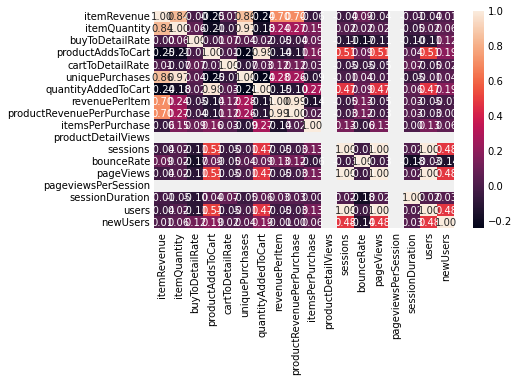

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

(array([0]), <a list of 1 Text major ticklabel objects>)

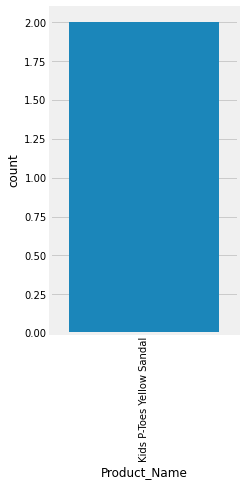

In [ ]:
plt.figure(figsize=(3,6))
sns.countplot(df[df['Product_Name'] == 'Kids P-Toes Yellow Sandal']['Product_Name'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68]), <a list of 69 Text major ticklabel objects>)

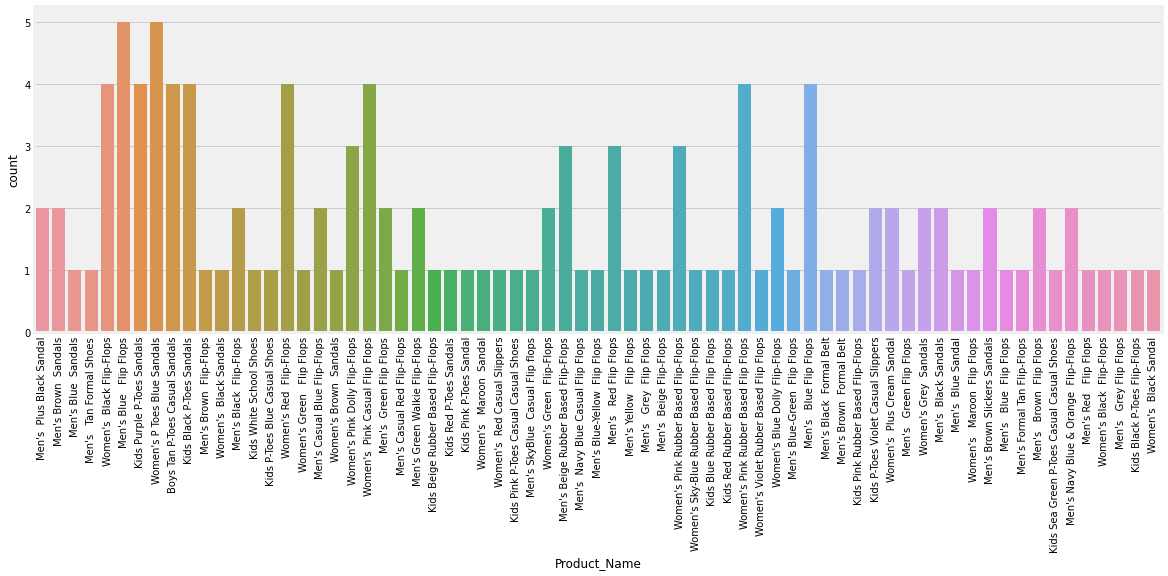

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(df_new[df_new['Product_Name'] != 'Kids P-Toes Yellow Sandal']['Product_Name'])
plt.xticks(rotation=90)

From above plots and calculations we can see that vast majority of sales were made for both men and women compare to kids. So, We can say our dataset is skewed to the men and women side.

## **5. Detecting outliers**

There are few different methods to detect outliers: box plots, using IQR, scatter plot also works in some cases (and this is one of those). Also, detecting outliers using scatter plot is pretty intuitive. We plot our data and remove data points that visually are definitely out of range.

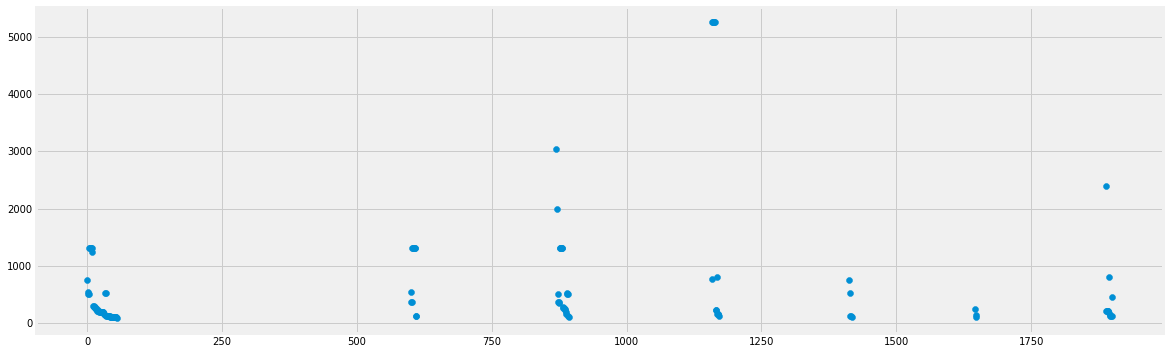

In [ ]:
plt.figure(figsize=(18,6))
plt.scatter(x=df_new.index, y=df_new['total_revenue'])

Let's remove obvious outliers

(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000.]), <a list of 10 Text major ticklabel objects>)

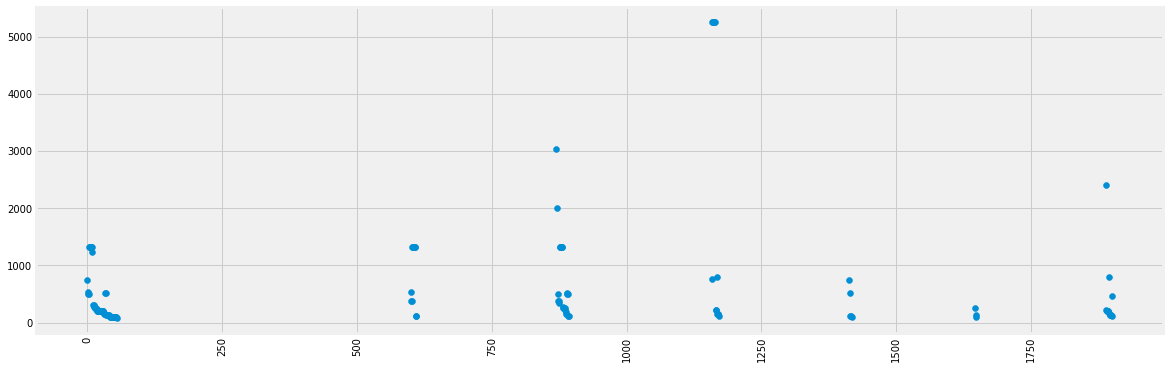

In [ ]:
df = df_new[df_new['total_revenue'] < 1000]
plt.figure(figsize=(18,6))
plt.scatter(x=df_new.index, y=df_new['total_revenue'])
plt.xticks(rotation=90)

After removing obvious outliers we still see some values that are out of normal distribution. To understand better the distribution of our data let's check out different percentiles of our numeric features.

In [ ]:
df.quantile([0.05, 0.95, 0.98, 0.99, 0.999])

,itemRevenue,itemQuantity,revenuePerItem,users,newUsers,total_revenue
0.050,95.00,1.0,95.00,1.00,0.0,95.00
0.950,505.00,2.0,505.00,2.00,2.0,570.50
0.980,749.00,2.0,749.00,2.06,2.0,761.22
0.990,749.30,2.0,749.30,3.00,2.0,796.00
0.999,758.03,2.0,758.03,3.00,2.0,796.00


We can see that if we remove some percentage of our data points we will get rid of absolute outliers and will have more balaced dataset.

(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000.]), <a list of 10 Text major ticklabel objects>)

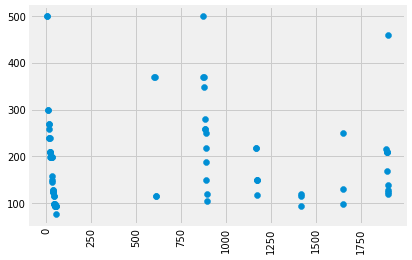

In [ ]:
df_quantile = df_new[df_new['total_revenue'] < 500]
plt.scatter(x=df_quantile.index, y=df_quantile['total_revenue'])
plt.xticks(rotation=90)

In [ ]:
df_quantile.describe()

,itemRevenue,itemQuantity,revenuePerItem,users,newUsers,total_revenue
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,191.000000,1.011765,189.647059,1.152941,0.505882,193.705882
std,95.043317,0.108465,95.299710,0.422743,0.569535,99.343628
min,77.000000,1.000000,77.000000,1.000000,0.000000,77.000000
25%,117.500000,1.000000,115.000000,1.000000,0.000000,117.500000
50%,189.000000,1.000000,169.000000,1.000000,0.000000,189.000000
75%,230.000000,1.000000,219.000000,1.000000,1.000000,239.000000
max,499.000000,2.000000,499.000000,3.000000,2.000000,499.000000


Looks like our data is almost ready for modelling. We performed a clean up, we removed outliers that were disturbing the balance of our dataset, we removed invalid records - now our data looks much better! and it doesn't lose it's value

**Visually checking distribution of numeric features**

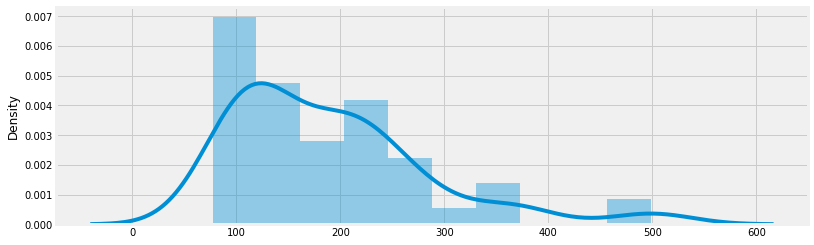

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['revenuePerItem'] < 500]['revenuePerItem'].values, kde=True, bins=10)

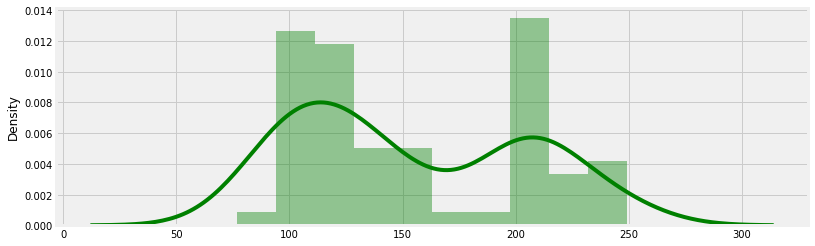

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['revenuePerItem'] < 250]['revenuePerItem'].values, kde=True, bins=10, color='green')

From these histograms we can see that vast majority of items sold in this store has low price range - 50 to 250 pounds

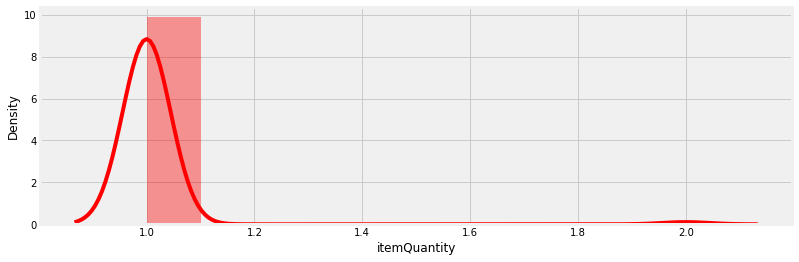

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['itemQuantity'] <= 30]['itemQuantity'], kde=True, bins=10, color='red')

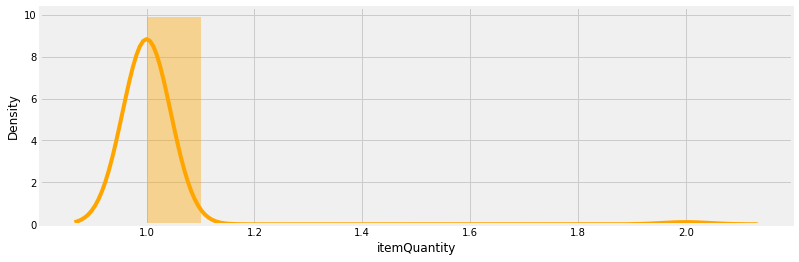

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['itemQuantity'] <= 15]['itemQuantity'], kde=True, bins=10, color='orange')

From these histograms we that people bought normally 1.0-1.2 items or at 2.0 - maybe there were some kind of offers for sets

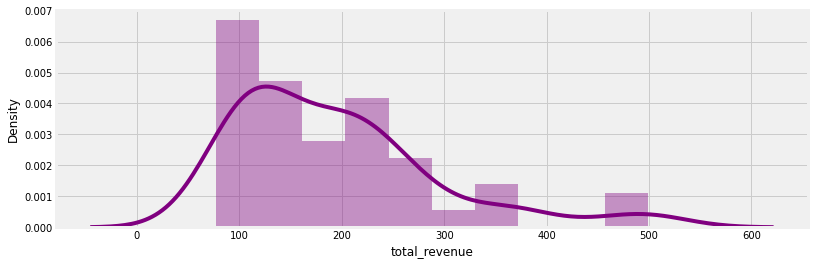

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['total_revenue'] < 500]['total_revenue'], kde=True, bins=10, color='purple')

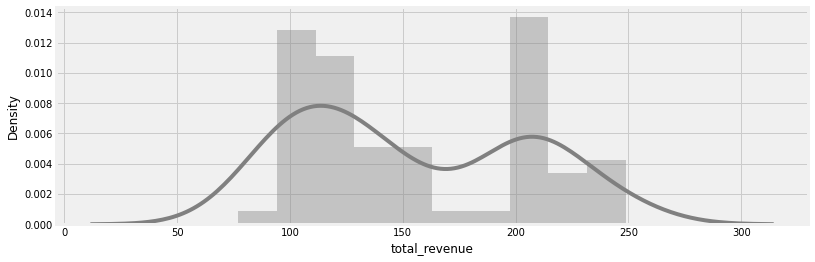

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['total_revenue'] < 250]['total_revenue'], kde=True, bins=10, color='grey')

From these histograms we can understand that majority of sales per order were in range 100-250 pounds each.

## **6. Spliting the Dataset**
To split correctly, lets first see how classes are distributed over the full dataset

In [ ]:
df_len = df_new['total_revenue'].value_counts() / len(df_new['total_revenue'])
df_len.head()

1316.0    0.142857
95.0      0.071429
209.0     0.063492
199.0     0.063492
5264.0    0.047619
Name: total_revenue, dtype: float64

**Simple split**

Lets first try a simple random split and lets see if the proportions are kept equal.

In [ ]:
from sklearn.model_selection import train_test_split
# split
train_set, test_set = train_test_split(df_new, test_size=0.2, random_state=42)

In [ ]:
test_set['total_revenue'].value_counts() / len(test_set['total_revenue'])

1316.0    0.192308
209.0     0.115385
5264.0    0.076923
98.0      0.076923
539.0     0.038462
3036.0    0.038462
159.0     0.038462
95.0      0.038462
117.5     0.038462
125.0     0.038462
239.0     0.038462
759.0     0.038462
1236.0    0.038462
77.0      0.038462
299.0     0.038462
199.0     0.038462
749.0     0.038462
129.0     0.038462
Name: total_revenue, dtype: float64

We see there is some difference between the proportion of each class compared to the original datase

### **7. Logistic Regression**

Now we have to split our data into train-test data to be able to train our model and validate its capabilities.

In [ ]:
# Library imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X = df_new[['itemRevenue', 'total_revenue', 'revenuePerItem', 'users', 'newUsers']]
y = df_new['itemQuantity']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.7631578947368421

The accuuracy score of LR is 0.76 which is not a bad one

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.78      1.00      0.88        28
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         1

    accuracy                           0.76        38
   macro avg       0.44      0.50      0.47        38
weighted avg       0.60      0.76      0.67        38



###  **Conclusions**
This is a basic analysis of a transactions dataset with a model that predicts sales. Still a lot of things can be improved:

* Most of the time,the number of products ordered has been only 1  
* Average time taken for delivery is a week can be improved  
* Can Perform cluster analysis and create features based on it  
* Can Make a deeper split of dates  
* Get more insights from Descriptions and Stock numbers  
* Compare domestic and abroad sales
* Try deep learning models  
* Also we can play much more with tuning of hyperparameters of our models and give it more time for training.  

The classification report shows that the macro average and weighted average is 0.47 and 0.67.







